In [1]:
import pandas as pd

In [2]:
#importing the dataset
df = pd.read_csv("score.csv")

In [3]:
#Checking the top values
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


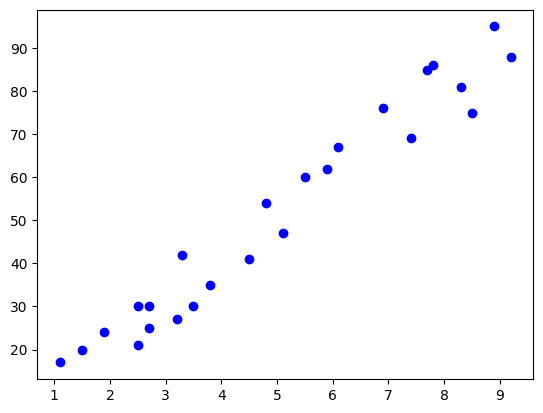

In [64]:
import matplotlib.pyplot as plt

plt.scatter(df['Hours'], df['Scores'], c ="blue")

plt.show()



In [ ]:
#The plot is linear , hence we can proceed with Linear Regression as we can see independence is maintained

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df["Hours"].isna().sum()

0

In [65]:
df["Scores"].isna().sum()

0

There doesn't seem to be any null values in the dataset

<Axes: ylabel='Density'>

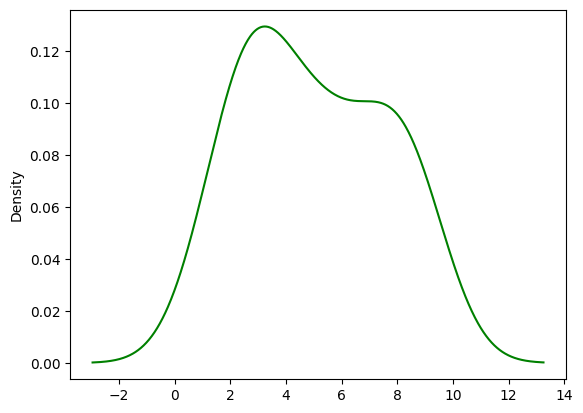

In [78]:

# importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
  
# # loading the dataset
# # from seaborn library
# data = sns.load_dataset('score.csv')
  
# # viewing the dataset
# print(data.head(4))
df.Hours.plot.density(color='green')

<Axes: ylabel='Density'>

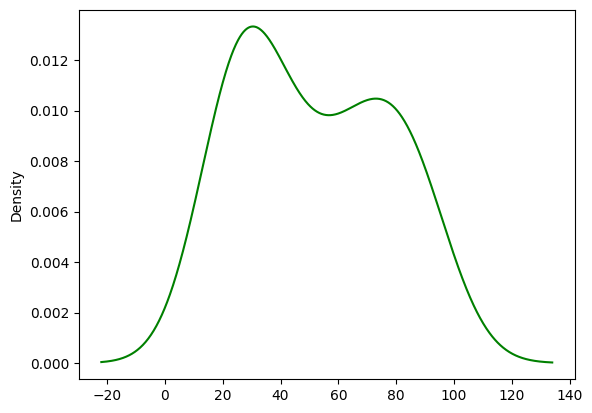

In [79]:
df.Scores.plot.density(color='green')

In [77]:
df.groupby("Hours").count()

,Scores
Hours,
1.1,1
1.5,1
1.9,1
2.5,2
2.7,2
3.2,1
3.3,1
3.5,1
3.8,1


In [14]:
# Independant variable
X = df["Hours"]

In [15]:
X

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64

In [16]:
# Dependant variable
Y = df["Scores"]

In [17]:
Y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression



In [12]:
lr = LinearRegression()

In [41]:
X_train = X_train.values.reshape(-1,1)

In [42]:
y_train = y_train.values.reshape(-1,1)

In [43]:
lr.fit(X_train,y_train)

LinearRegression()

In [44]:
X_test

8     8.3
16    2.5
0     2.5
23    6.9
11    5.9
9     2.7
13    3.3
1     5.1
22    3.8
5     1.5
2     3.2
12    4.5
15    8.9
Name: Hours, dtype: float64

In [45]:
y_test


8     81
16    30
0     21
23    76
11    62
9     25
13    42
1     47
22    35
5     20
2     27
12    41
15    95
Name: Scores, dtype: int64

In [46]:
lr.predict(X_test[11].reshape(-1,1))

array([[60.62443207]])

In [47]:
X_test = X_test.values.reshape(-1,1)

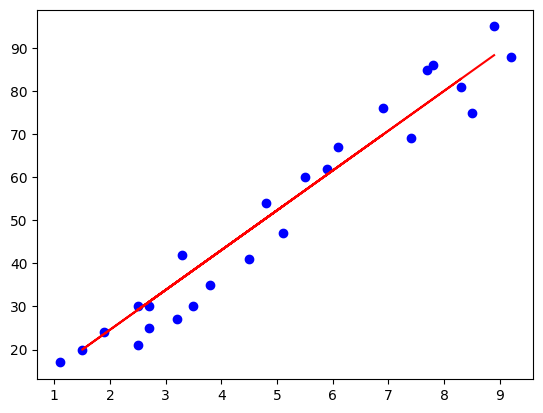

In [48]:
plt.scatter(df['Hours'], df['Scores'], c ="blue")
plt.plot(X_test,lr.predict(X_test),c="red")
# To show the plot
plt.show()

In [60]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
y_pred = lr.predict(X_test).reshape(-1,1)

In [61]:
y_pred

array([[82.79478941],
       [29.21642585],
       [29.21642585],
       [69.86208096],
       [60.62443207],
       [31.06395563],
       [36.60654496],
       [53.23431296],
       [41.22536941],
       [19.97877696],
       [35.68278007],
       [47.69172363],
       [88.33737874]])

R2 score:  0.9426307007429557
RMSE:  5.676908377230681


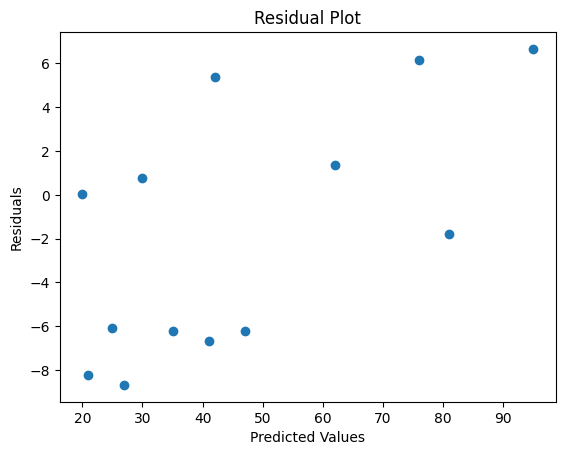

In [62]:
# Evaluate the model using R2 and RMSE metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("R2 score: ", r2)
print("RMSE: ", rmse)

y_pred = y_pred.flatten()
y_pred.reshape(-1,1)

# Plot the residual plot
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

There seem to be no visible patterns in the residual plot Hence  
the linear regression model has done a good job of capturing the underlying relationship between 
the independent and dependent variables. 